In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_excel("C:/Users/shruti/Desktop/Autism child data.xlsx")
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,...,m,Others,no,no,Jordan,no,5,4-11 years,Parent,NO
1,1,1,0,0,1,1,0,1,0,0,...,m,Middle Eastern,no,no,Jordan,no,5,4-11 years,Parent,NO
2,1,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,United States,no,10,4-11 years,Parent,YES
3,1,0,1,1,1,1,0,1,0,1,...,m,White-European,no,no,United Kingdom,no,7,4-11 years,Parent,YES
4,1,1,1,1,1,1,1,1,0,0,...,f,Middle Eastern,no,no,Bahrain,no,8,4-11 years,Parent,YES


In [3]:
df.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [4]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.00000,249.000000,249.000000,249.000000,249.000000
mean,0.682731,0.514056,0.746988,0.570281,0.751004,0.710843,0.62249,0.477912,0.538153,0.730924,6.345382
std,0.466351,0.500809,0.435613,0.496033,0.433302,0.454284,0.48574,0.500518,0.499546,0.444373,2.362593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,5.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,1.000000,1.000000,7.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,10.000000


In [5]:
df.shape

(249, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         249 non-null    int64 
 1   A2_Score         249 non-null    int64 
 2   A3_Score         249 non-null    int64 
 3   A4_Score         249 non-null    int64 
 4   A5_Score         249 non-null    int64 
 5   A6_Score         249 non-null    int64 
 6   A7_Score         249 non-null    int64 
 7   A8_Score         249 non-null    int64 
 8   A9_Score         249 non-null    int64 
 9   A10_Score        249 non-null    int64 
 10  age              249 non-null    object
 11  gender           249 non-null    object
 12  ethnicity        249 non-null    object
 13  jundice          249 non-null    object
 14  austim           249 non-null    object
 15  contry_of_res    249 non-null    object
 16  used_app_before  249 non-null    object
 17  result           249 non-null    in

In [7]:
df = df.dropna()

In [8]:
df.columns = [ "A1_Score","A2_Score","A3_Score","A4_Score","A5_Score","A6_Score","A7_Score","A8_Score","A9_Score","A10_Score","age","gender","ethnicity","jaundice","autism","country_of_res","used_app_before","result","age_desc","relation","Class_ASD",]
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,age_desc,relation,Class_ASD
0,1,1,0,0,1,1,0,1,0,0,...,m,Others,no,no,Jordan,no,5,4-11 years,Parent,NO
1,1,1,0,0,1,1,0,1,0,0,...,m,Middle Eastern,no,no,Jordan,no,5,4-11 years,Parent,NO
2,1,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,United States,no,10,4-11 years,Parent,YES
3,1,0,1,1,1,1,0,1,0,1,...,m,White-European,no,no,United Kingdom,no,7,4-11 years,Parent,YES
4,1,1,1,1,1,1,1,1,0,0,...,f,Middle Eastern,no,no,Bahrain,no,8,4-11 years,Parent,YES


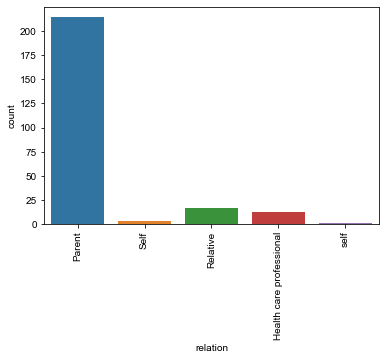

In [9]:
sns.countplot(x='relation',data=df)
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(5, 5)})

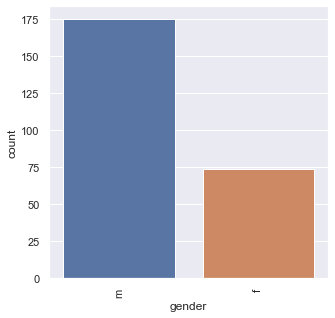

In [10]:
sns.countplot(x='gender',data=df)
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(5, 5)})

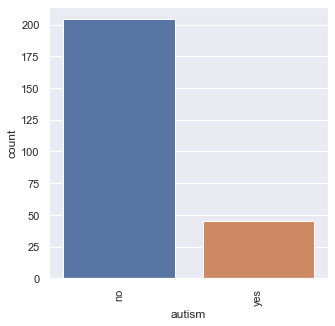

In [11]:
sns.countplot(x='autism',data=df)
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(5, 5)})

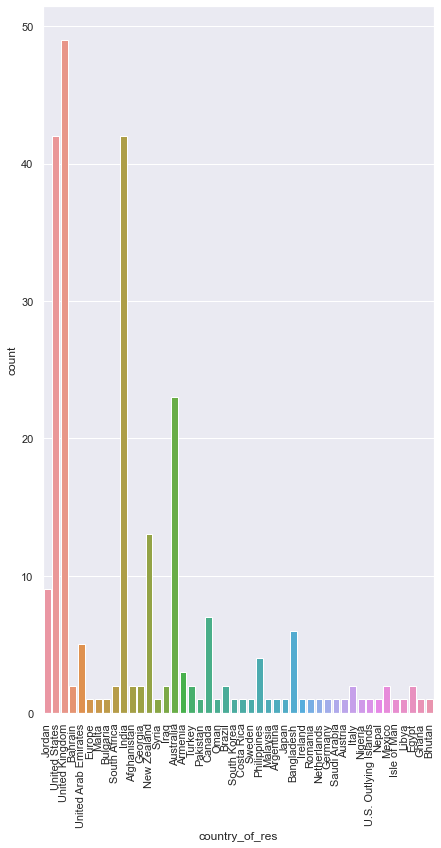

In [39]:
sns.countplot(x='country_of_res',data=df)
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(7, 13)})

(array([0, 1]), [Text(0, 0, 'NO'), Text(1, 0, 'YES')])

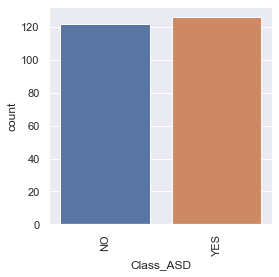

In [37]:
sns.countplot(x='Class_ASD',data=df)
plt.xticks(rotation=90)


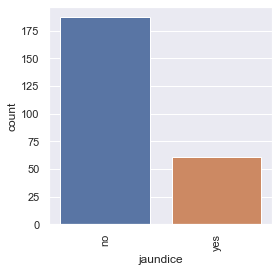

In [41]:
sns.countplot(x='jaundice',data=df)
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(4, 4)})

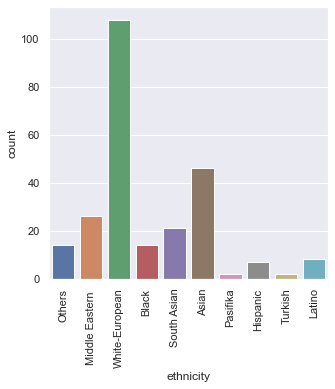

In [44]:
sns.countplot(x='ethnicity',data=df)
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(5,5)})

In [15]:
df = df[df['age']!='?']

In [16]:
org_data = df[[ "A1_Score", "A2_Score", "A3_Score", "A4_Score", "A5_Score", "A6_Score", "A7_Score", "A8_Score", "A9_Score", "A10_Score", "age", ]]


In [17]:
label_encoded_data = df[["gender", "autism", "jaundice", "Class_ASD"]]
label_encoded_data["gender"] = label_encoded_data["gender"].apply(lambda x: 1 if x == "m" else 0)
label_encoded_data["autism"] = label_encoded_data["autism"].apply(lambda x: 1 if x == "yes" else 0)
label_encoded_data["jaundice"] = label_encoded_data["jaundice"].apply(lambda x: 1 if x == "yes" else 0)
label_encoded_data["Class_ASD"] = label_encoded_data["Class_ASD"].apply(lambda x: 1 if x == "YES" else 0)
one_hot_encoded_data = df[["ethnicity"]]
one_hot_encoded_data = pd.get_dummies(one_hot_encoded_data)

<ipython-input-17-275d6b1e5e91>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_encoded_data["gender"] = label_encoded_data["gender"].apply(lambda x: 1 if x == "m" else 0)
<ipython-input-17-275d6b1e5e91>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_encoded_data["autism"] = label_encoded_data["autism"].apply(lambda x: 1 if x == "yes" else 0)
<ipython-input-17-275d6b1e5e91>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [18]:
fixed_data = pd.concat([org_data,label_encoded_data,one_hot_encoded_data],axis=1)

fixed_data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,ethnicity_Asian,ethnicity_Black,ethnicity_Hispanic,ethnicity_Latino,ethnicity_Middle Eastern,ethnicity_Others,ethnicity_Pasifika,ethnicity_South Asian,ethnicity_Turkish,ethnicity_White-European
0,1,1,0,0,1,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,1,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,1,0,0,0,0
3,1,0,1,1,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
4,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [19]:
X = fixed_data.drop(columns=['Class_ASD'])
y = fixed_data[['Class_ASD']]

In [20]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [21]:
X_test.shape

(75, 24)

In [22]:
y_train.shape

(173, 1)

In [23]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [24]:
y_pred=lr.predict(X_test)

In [25]:
lraccuracy=accuracy_score(y_test, y_pred)
lraccuracy

0.9866666666666667

In [26]:
RF=RandomForestClassifier(n_estimators=1000, max_depth=None, min_samples_split=2, random_state=0)
RF.fit(X_train,y_train)

<ipython-input-26-dc63c6ee6474>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train,y_train)


RandomForestClassifier(n_estimators=1000, random_state=0)

In [27]:
y_pred=RF.predict(X_test)
RFaccuracy=accuracy_score(y_test, y_pred)
RFaccuracy

0.9466666666666667

In [28]:
DT=DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)
DT.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [29]:
y_pred=DT.predict(X_test)
DTaccuracy=accuracy_score(y_test, y_pred)
DTaccuracy

0.84

In [30]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(kernel='linear')

In [31]:
y_pred=svc.predict(X_test)
svcaccuracy=accuracy_score(y_test, y_pred)
svcaccuracy

0.9866666666666667

In [32]:
svc.predict([[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1]])

array([1], dtype=int64)

In [33]:
lr.predict([[1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]])

array([0], dtype=int64)

In [34]:
data=pd.DataFrame({"Algorithm":['SUPPORT VECTOR MACHINE','LOGISTIC REGRESSION', 'RANDOM FOREST', 'DECISION TREE'],
                 "Accuracy":[svcaccuracy, lraccuracy, RFaccuracy, DTaccuracy]})

In [35]:
data

,Algorithm,Accuracy
0,SUPPORT VECTOR MACHINE,0.986667
1,LOGISTIC REGRESSION,0.986667
2,RANDOM FOREST,0.946667
3,DECISION TREE,0.840000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


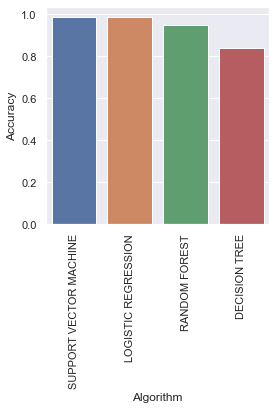

In [36]:
x=data['Algorithm']
y=data['Accuracy']
sns.barplot(x, y, data=data)
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(4, 4)})